# SeaRose Ice Incursion Incident 

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10
import numpy as np
from importlib import reload
from icedef import simulator, plot

## March 29, 2017

In [2]:
iceberg_start_time = np.datetime64('2017-03-29T01:45')
iceberg_start_latitude = 46.85639904
iceberg_start_longitude = -48.03872578
searose_latitude = 46.78851
searose_longitude = -48.01405

# Simulation

In [3]:
start_time = iceberg_start_time
end_time = iceberg_start_time + np.timedelta64(12, 'h')
time_frame = start_time, end_time
start_location = iceberg_start_latitude, iceberg_start_longitude

In [4]:
sim = simulator.Simulator(time_frame, start_location)

In [5]:
xds = sim.run_simulation(store_results_as='default')
xds = sim.run_simulation(store_results_as='5x5', **{'Ca': 5, 'Cw': 5})
xds = sim.run_simulation(store_results_as='1x8', **{'Ca': 1, 'Cw': 8})

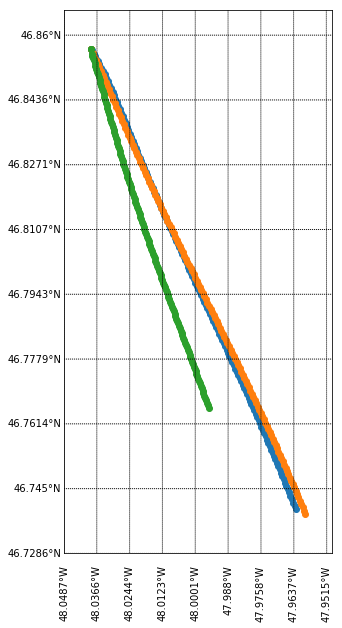

In [10]:
fig, ax = sim.plot_track(['default', '5x5', '1x8'])

Text(764.914,11215.6,'Start')

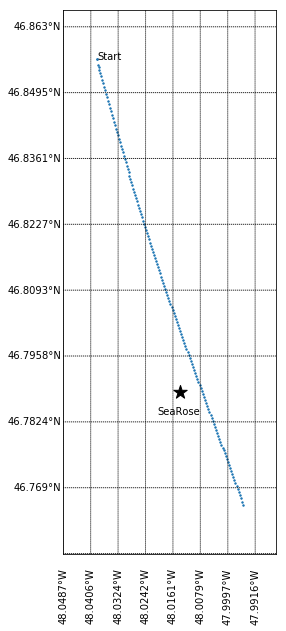

In [11]:
fig, ax = plt.subplots()
lats, lons = xds['latitude'].values, xds['longitude'].values
map_kwargs = plot.get_map_kwargs(min(lats), min(lons), max(lats), max(lons))
map_ = plot.get_map(draw=True, **map_kwargs)
xs, ys = map_(lons, lats)
ax.scatter(xs, ys, s=2)
x_searose, y_searose = map_(searose_longitude, searose_latitude)
ax.scatter(x_searose, y_searose, s=200, marker='*', color='black')
ax.annotate('SeaRose', (x_searose - 500, y_searose - 500))
ax.annotate('Start', (xs[0], ys[0]))

# Husky Ice Management Plan

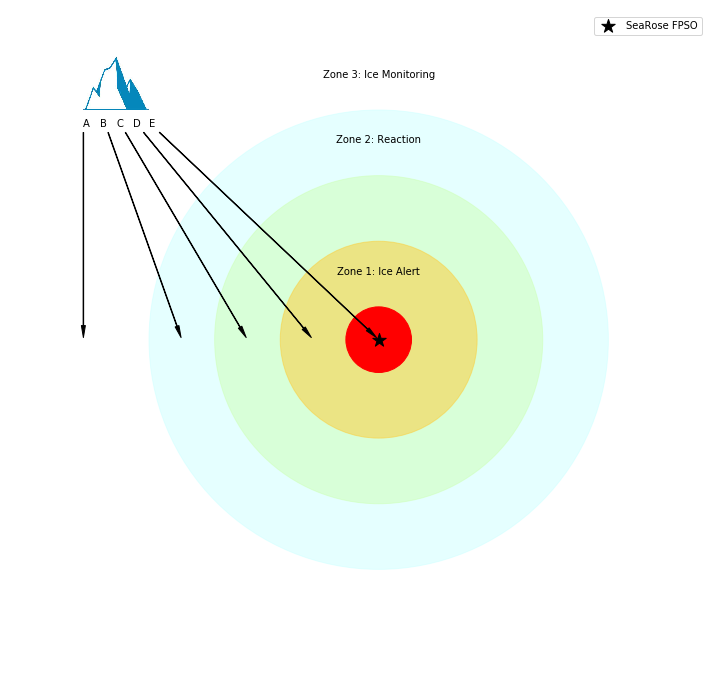

In [12]:
# RGBA codes
light_blue = (0.8, 1, 1, .5)
light_green = (0.8, 1, 0.7, .5)
light_orange = (1, 0.8, 0.2, 0.5)
light_red = (1, 0.2, 0.1, 0.5) 

circle1 = plt.Circle((0, 0), 0.7, color=light_blue)
circle2 = plt.Circle((0, 0), 0.5, color=light_green)
circle3 = plt.Circle((0, 0), 0.3, color=light_orange)
circle4 = plt.Circle((0, 0), 0.1, color='red')

fig, ax = plt.subplots() 

ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)

im = plt.imread('../images/iceberg_icon.png')
ax.imshow(im, extent=[-.9, -.7, .7, .9])

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

ax.set_axis_off()

arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=4, shrink=0.01)

ax.annotate('A', xy=(-0.9, 0), xytext=(-0.9, .65), arrowprops=arrow_properties)
ax.annotate('B', xy=(-.6, .0), xytext=(-0.85, .65), arrowprops=arrow_properties)
ax.annotate('C', xy=(-.4, .0), xytext=(-0.80, .65), arrowprops=arrow_properties)
ax.annotate('D', xy=(-.2, .0), xytext=(-0.75, .65), arrowprops=arrow_properties)
ax.annotate('E', xy=(0, .0), xytext=(-0.70, .65), arrowprops=arrow_properties)

ax.annotate('Zone 3: Ice Monitoring', (0, 0.8), horizontalalignment='center')
ax.annotate('Zone 2: Reaction', (0, 0.6), horizontalalignment='center')
ax.annotate('Zone 1: Ice Alert', (0, 0.2), horizontalalignment='center')

ax.scatter(0, 0, marker='*', s=200, color='black', zorder=10, label='SeaRose FPSO')
ax.legend()
fig.tight_layout()
plt.show()